<a href="https://colab.research.google.com/github/srivastavavansh94/Resume_Categorizer/blob/main/Resume_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('/content/drive/MyDrive/ResumeDataSet.csv')

In [8]:
data.shape

(962, 2)

In [9]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [10]:
data.Category.value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


In [11]:
data['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [12]:
data.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

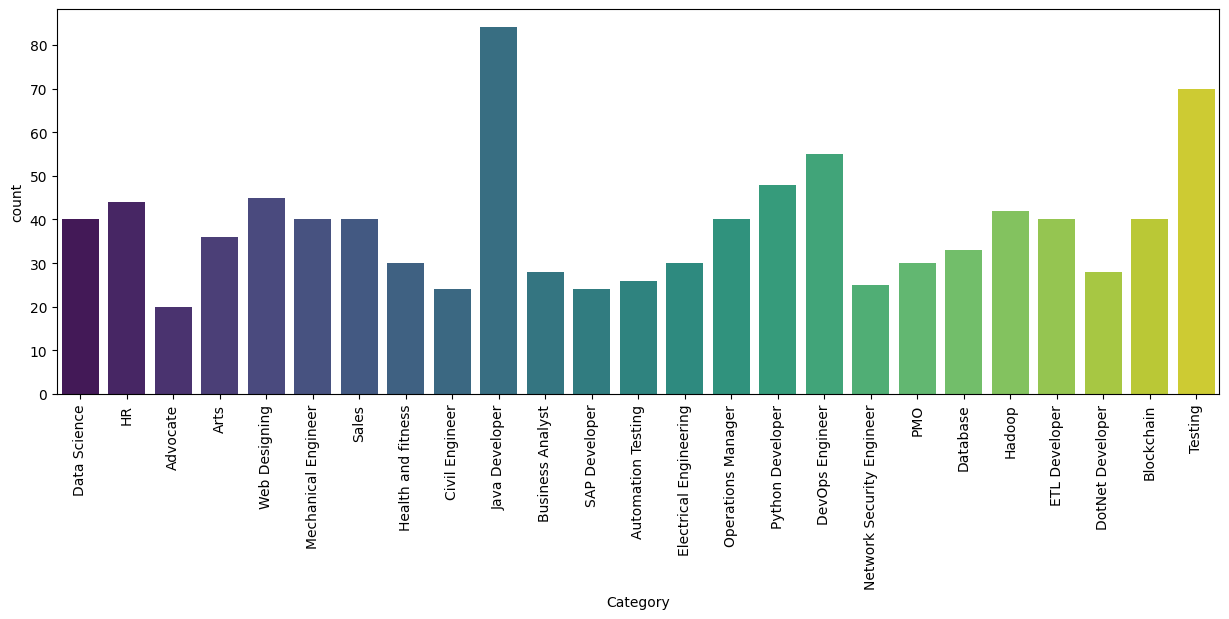

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(data, x='Category', palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [14]:
import re

def cleanResumeText(text):
  cleanText = re.sub('\s+', ' ', text)
  cleanText = re.sub(r'http\S+|[\*/\(\)\-\.\,]|[^\x00-\x7f]', '', cleanText).lower()
  return cleanText

In [15]:
cleanResumeText(data['Resume'][0])

'skills  programming languages: python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery  machine learning: regression svm nave bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca & neural nets  database visualizations: mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau  others: regular expression html css angular 6 logstash kafka python flask git docker computer vision  open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate  ernst & young llp skill details javascript exprience  24 months jquery exprience  24 months python exprience  24 monthscompany details company  ernst & young llp description  fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a

In [16]:
data['Resume'] = data['Resume'].apply( lambda x : cleanResumeText(x))

In [17]:
data.head()

,Category,Resume
0,Data Science,skills programming languages: python pandas n...
1,Data Science,education details may 2013 to may 2017 be uitr...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills r python sap hana tableau sap hana...
4,Data Science,education details mca ymcaust faridabad haryan...


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
le.fit(data['Category'])
data['Category'] = le.transform(data['Category'])

In [20]:
data.head()

,Category,Resume
0,6,skills programming languages: python pandas n...
1,6,education details may 2013 to may 2017 be uitr...
2,6,areas of interest deep learning control system...
3,6,skills r python sap hana tableau sap hana...
4,6,education details mca ymcaust faridabad haryan...


In [21]:
data['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
# array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

tfidf.fit(data['Resume'])
vectorizeText = tfidf.transform(data['Resume'])

In [23]:
vectorizeText

<962x7857 sparse matrix of type '<class 'numpy.float64'>'
	with 164118 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(vectorizeText, data['Category'], test_size=0.2, random_state=42)

In [25]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)
ypred = svm_clf.predict(x_test)
print(accuracy_score(y_test, ypred))

0.9948186528497409


In [26]:
from sklearn import tree

dtc_clf = tree.DecisionTreeClassifier()
dtc_clf.fit(vectorizeText, data['Category'])
ypred_dtc = dtc_clf.predict(x_test)
print(accuracy_score(y_test, ypred_dtc))

1.0


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(vectorizeText, data['Category'])
ypred_knn = knn_clf.predict(x_test)
print(accuracy_score(y_test, ypred_knn))

0.9948186528497409


In [40]:
import pickle
path = '/content/drive/MyDrive'
pickle.dump(tfidf, open(path + '/tfidf.pkl', 'wb'))
pickle.dump(svm_clf, open(path +' /svm_clf.pkl', 'wb'))

In [41]:
tfidf = pickle.load(open('/content/drive/MyDrive/tfidf.pkl', 'rb'))
svm_clf = pickle.load(open('/content/drive/MyDrive/svm_clf.pkl', 'rb'))

In [29]:
myResume = '''CAREER OBJECTIVE
To succeed in an environment of growth and excellence and earn a job which provides me job satisfaction and self-development and help me achieve personal as well as organizational goals. ________________________________________
EDUCATION
B. Tech CSE (74%)                                           		                                                                           	              (2020-2024)
Shivalik College of Engineering
Senior Secondary School (81%)	       			 					             (2019-2020)
Secondary School (93%)										             (2017-2018)
________________________________________
TECHNICAL SKILLS
Programming languages: Java, SQL, HTML
Libraries known: Numpy, pandas, matplotlib
Application Software: VS Code, Google Colab
________________________________________
PROJECT
Intelligent Traffic Control System for Ambulance Priority using Sound Frequency Recognition
•	Developed CNN model achieving 85% accuracy in classifying ambulances at traffic junctions, utilizing distinct datasets of ambulances and cars.
•	Integrated advanced sound frequency recognition for precise real-time ambulance detection, enabling dynamic manipulation of traffic lights.
•	Designed and implemented from scratch to address the classification problem of ambulance presence in traffic scenarios, optimizing traffic flow based on model responses.

Loan Prediction System
•	Developed loan eligibility prediction system using decision tree, logistic regression, and random forest models, achieving highest accuracy of 90% with logistic regression.
•	Conducted data visualization using graphs to analyze gender, loan amount and dependents optimizing loan approval predictions.

Bhojan-Vidhi
•	Website for searching food recipe based on ingredients
•	Used a food recipe API
________________________________________
CERTIFICATION / WORKSHOP
Training on fundamentals of AWS
Workshop on Machine Learning
ICEDET conference certificate
Web development course from Udemy
________________________________________
TUTORING EXPERIENCE
Duration: June 2020 – March 2024
Grade Levels: Tutored students from class 6 to 10
'''

In [30]:
category_map = {
    6: 'Data Science',
    12: 'HR',
    0: 'Advocate',
    1: 'Arts',
    24: 'Web Designing',
    16: 'Mechanical Engineer',
    22: 'Sales',
    14: 'Health and Fitness',
    5: 'Civil Enigneer',
    15: 'Java Developer',
    4: 'Business Analyst',
    21: 'SAP Developer',
    2: 'Automation Testing',
    11: 'Electrical Engineer',
    18: 'Operations Manager',
    20: 'Python Developer',
    8: 'DevOps Engineer',
    17: 'Network Security Engineer',
    19: 'PMO',
    7: 'Database Engineer',
    13: 'Big Data Engineer',
    10: 'ETL Developer',
    9: 'DotNet Developer',
    3: 'Blockchain Developer',
    23: 'Tester'
}

In [42]:
cleanResume = cleanResumeText(myResume)

vText = tfidf.transform([cleanResume])

prediction = svm_clf.predict(vText)

print(category_map[prediction[0]])

Data Science
